<a href="https://colab.research.google.com/github/aamirrajput/Githubaamirali/blob/main/RDKit_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install RDKit. Takes 2-3 minutes
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge python=3.7
!time conda install -q -y -c conda-forge rdkit=2020.09.02

--2021-03-15 03:09:46--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-03-15 03:09:46--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   172MB/s    in 0.5s    

2021-03-15 03:09:47 (172 MB/s) - ‘Miniconda3-latest-Linux

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

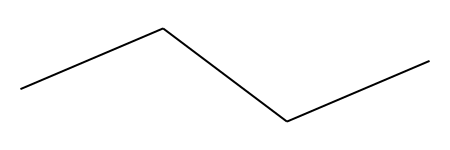

In [ ]:
mol = Chem.MolFromSmiles('CCCC')
mol

In [ ]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [ ]:
mw = Descriptors.MolWt(mol)
mw

58.123999999999995

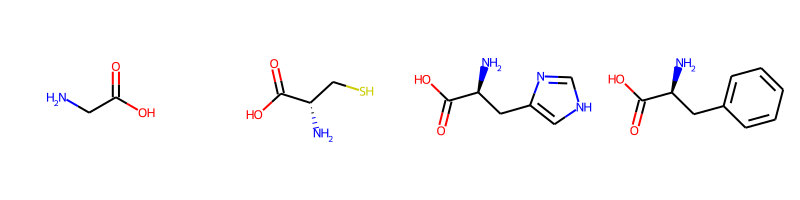

In [16]:
smiles_list = ['C(C(=O)O)N','C([C@@H](C(=O)O)N)S', 
               'O=C([C@H](CC1=CNC=N1)N)O','N[C@@H](CC1=CC=CC=C1)C(O)=O']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img



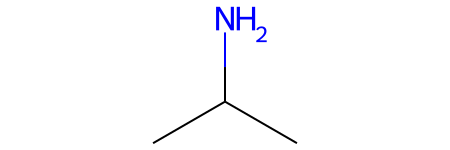

In [21]:
Chem.MolFromSmiles('CC(N)C')

In [19]:
pattern = Chem.MolFromSmiles('S')
pattern = Chem.MolFromSmiles('C(=O)O')
pattern = Chem.MolFromSmiles('CC(N)C')
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))

False
True
True
True


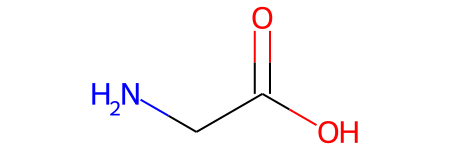

In [22]:
glycine = mol_list[0]
glycine

In [25]:
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)

(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)